# Dinosaurs & Movies Data Analysis for DataCamp Scholarship

## 📖 Background
The second "Everyone Can Learn Data" Scholarship from DataCamp is now open for entries. 

The challenges below test your coding skills you gained from beginner courses on either Python, R, or SQL. Pair them **with the help of AI** and your **creative thinking skills** and win **$5,000** for your future data science studies!

The scholarship is open to secondary and undergraduate students, and other students preparing for graduate-level studies (getting their Bachelor degree). Postgraduate students (PhDs) or graduated students (Master degree) cannot apply. 

The challenge consist of two parts, make sure to complete both parts before submitting. Good luck!

## 💡 Learn more

The following DataCamp courses can help review the skills to get started for this challenge:

* [Intermediate Python](https://app.datacamp.com/learn/courses/intermediate-python)
* [Introduction to the Tidyverse in R](https://app.datacamp.com/learn/courses/introduction-to-the-tidyverse)
* [Introduction to SQL](https://www.datacamp.com/courses/introduction-to-sql)

## ℹ️ Introduction to Data Science Notebooks

You can skip this section if you are already familiar with data science notebooks.

### Data science notebooks
A _data science notebook_ is a document containing text cells (what you're reading now) and code cells. What is unique with a notebook is that it's **interactive**: You can change or add code cells and then **run** a cell by selecting it and then clicking the **Run** button to the right ( <strong>▶</strong>, or Run All on top) or hitting `control + enter`.

The result will be displayed directly in the notebook. 

Try running the Python cell below:

In [23]:
# Run this cell to see the result (click on Run on the right, or Ctrl|CMD + Enter)
100 * 1.75 * 20

3500.0

Modify any of the numbers and rerun the cell. 

You can add a Markdown, Python|R, or SQL cell by clicking on the **Add Markdown**, **Add Code**, and **Add SQL** buttons that appear as you move the mouse pointer near the bottom of any cell. 

🤖 You can also make use of our AI assistent, by asking it what you want to do. See it in action [here](https://www.datacamp.com/blog/data-to-insights-datcamp-workspace-ai-assistant).

Here at DataCamp, we call our interactive notebook **Workspace**. You can find out more about Workspace [here](https://workspace-docs.datacamp.com/).

# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

In [24]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [25]:
# Preview the dataframe
dinosaurs

occurrence_no               name  ...         class             family
0            130294  Protarchaeopteryx  ...    Saurischia  Archaeopterygidae
1            130295        Caudipteryx  ...    Saurischia    Caudipterygidae
2            139242        Gorgosaurus  ...    Saurischia    Tyrannosauridae
3            139250        Gorgosaurus  ...    Saurischia    Tyrannosauridae
4            139252        Gorgosaurus  ...    Saurischia    Tyrannosauridae
...             ...                ...  ...           ...                ...
4946        1360627      Isaberrysaura  ...  Ornithischia                NaN
4947        1363632        Stegosaurus  ...  Ornithischia      Stegosauridae
4948        1363633     Othnielosaurus  ...  Ornithischia                NaN
4949        1364695          Iguanodon  ...  Ornithischia                NaN
4950        1365108         Luluichnus  ...  Ornithischia                NaN

[4951 rows x 12 columns]

In [26]:
dinosaurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


1. How many different dinosaur names are present in the data?

In [27]:
print(dinosaurs['name'].nunique()) 
# Hence there are 1042 different dinosaurs names present in the data

1042


2. Which was the largest dinosaur?

In [28]:
print(dinosaurs[dinosaurs['length_m'] == dinosaurs['length_m'].max()]['name'].unique())
# The supersaurus and Argensaurus were the largest dinosaurs


['Supersaurus' 'Argentinosaurus']


In [29]:
unique_values = {}

for col in dinosaurs.columns:
    unique_values[col] = dinosaurs[col].unique()
print(unique_values)

{'occurrence_no': array([ 130294,  130295,  139242, ..., 1363633, 1364695, 1365108]), 'name': array(['Protarchaeopteryx', 'Caudipteryx', 'Gorgosaurus', ...,
       'Elrhazosaurus', 'Isaberrysaura', 'Luluichnus'], dtype=object), 'diet': array(['omnivorous', 'carnivorous', 'herbivorous', nan], dtype=object), 'type': array(['small theropod', 'large theropod', 'sauropod', nan, 'ornithopod',
       'ceratopsian', 'armored dinosaur'], dtype=object), 'length_m': array([ 2.  ,  1.  ,  8.6 ,  9.  , 18.  , 12.  , 15.  , 23.  ,   nan,
       10.  , 26.  ,  4.  , 21.  , 22.  ,  6.  ,  1.8 , 24.  ,  7.  ,
        5.  ,  1.5 ,  6.4 ,  3.  ,  6.2 ,  8.1 , 20.  ,  7.6 ,  6.5 ,
       12.5 ,  4.2 ,  0.65, 14.  ,  2.5 ,  0.6 ,  2.1 , 30.  , 21.5 ,
        4.4 ,  1.7 ,  4.1 , 35.  ,  7.4 ,  5.7 ,  8.  , 28.  ,  3.5 ,
        2.4 , 11.  ,  5.15,  5.3 ,  8.2 , 13.  ,  1.3 ,  0.8 , 17.  ,
        3.4 ,  0.45,  2.37,  4.7 , 25.  ,  1.6 ,  1.1 ,  2.3 ,  1.2 ,
        5.5 ,  4.6 ,  6.8 ,  4.5 ,  8.5 ,  6.6 ,  

2.Missing data in the dataset

In [30]:
print(dinosaurs.isna().sum())

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64


In [31]:
# Imputing missing values based on other features
from sklearn.impute import SimpleImputer
# Creating an imputer object
imputer = SimpleImputer(strategy='most_frequent')
# Fitting and Transforming the data using the imputer object
dinosaurs[['diet','type','length_m','region','family']] = imputer.fit_transform(dinosaurs[['diet','type','length_m','region','family']].values)

3. What dinosaur type has the most occurences in this dataset?

ornithopod


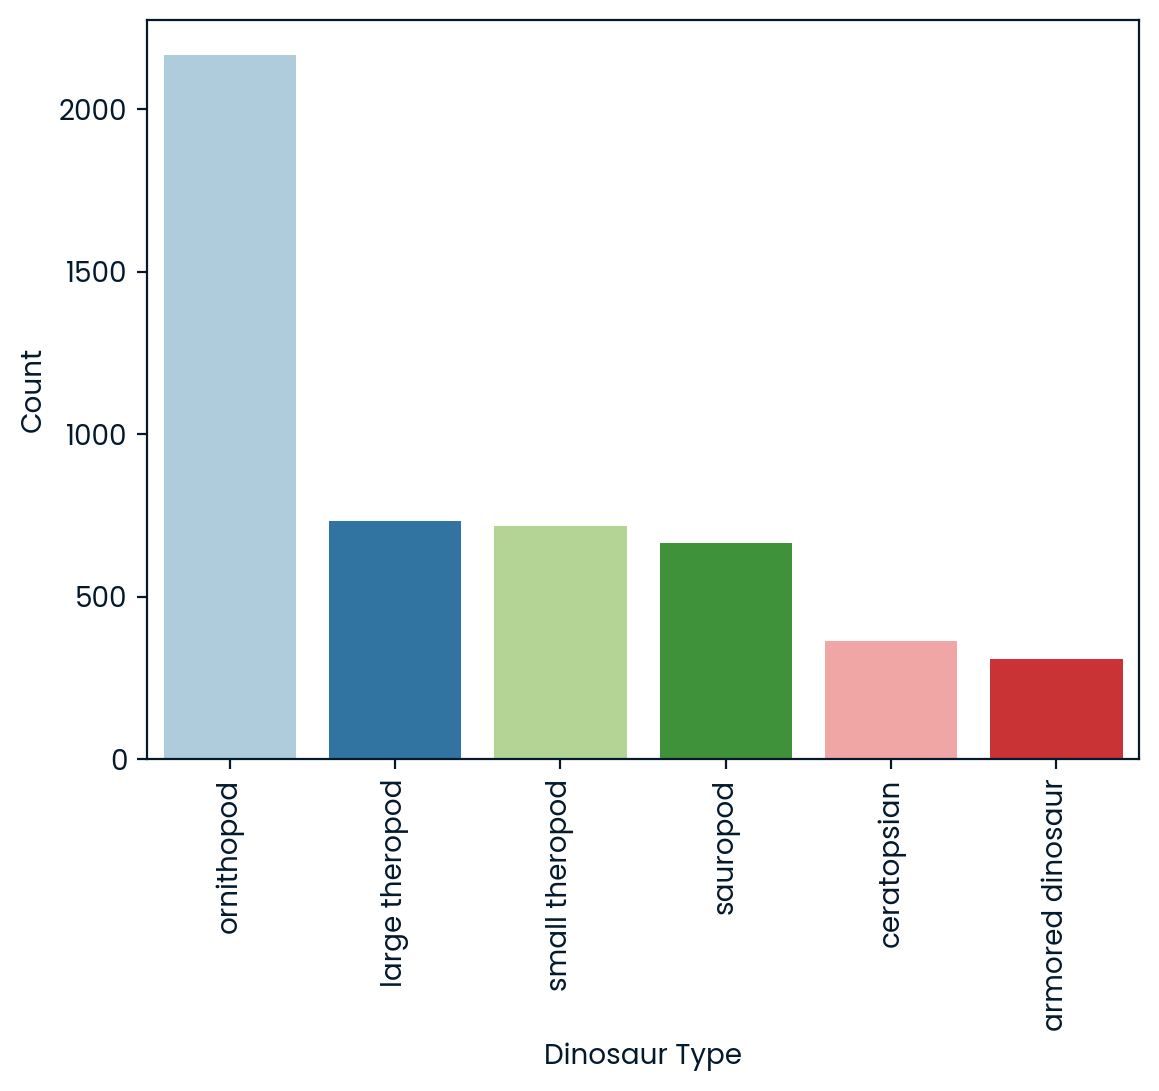

In [32]:
print(dinosaurs['type'].mode()[0]) 
# The code below simply tells us what dinosaur type has the most occurence in the dataset
import matplotlib.pyplot as plt
import seaborn as sns
type_counts = dinosaurs['type'].value_counts()
sns.barplot(x = type_counts.index,y =type_counts,palette=['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c'])
plt.xticks(rotation=90)
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.show()

4. Did dinosaurs get bigger over time?

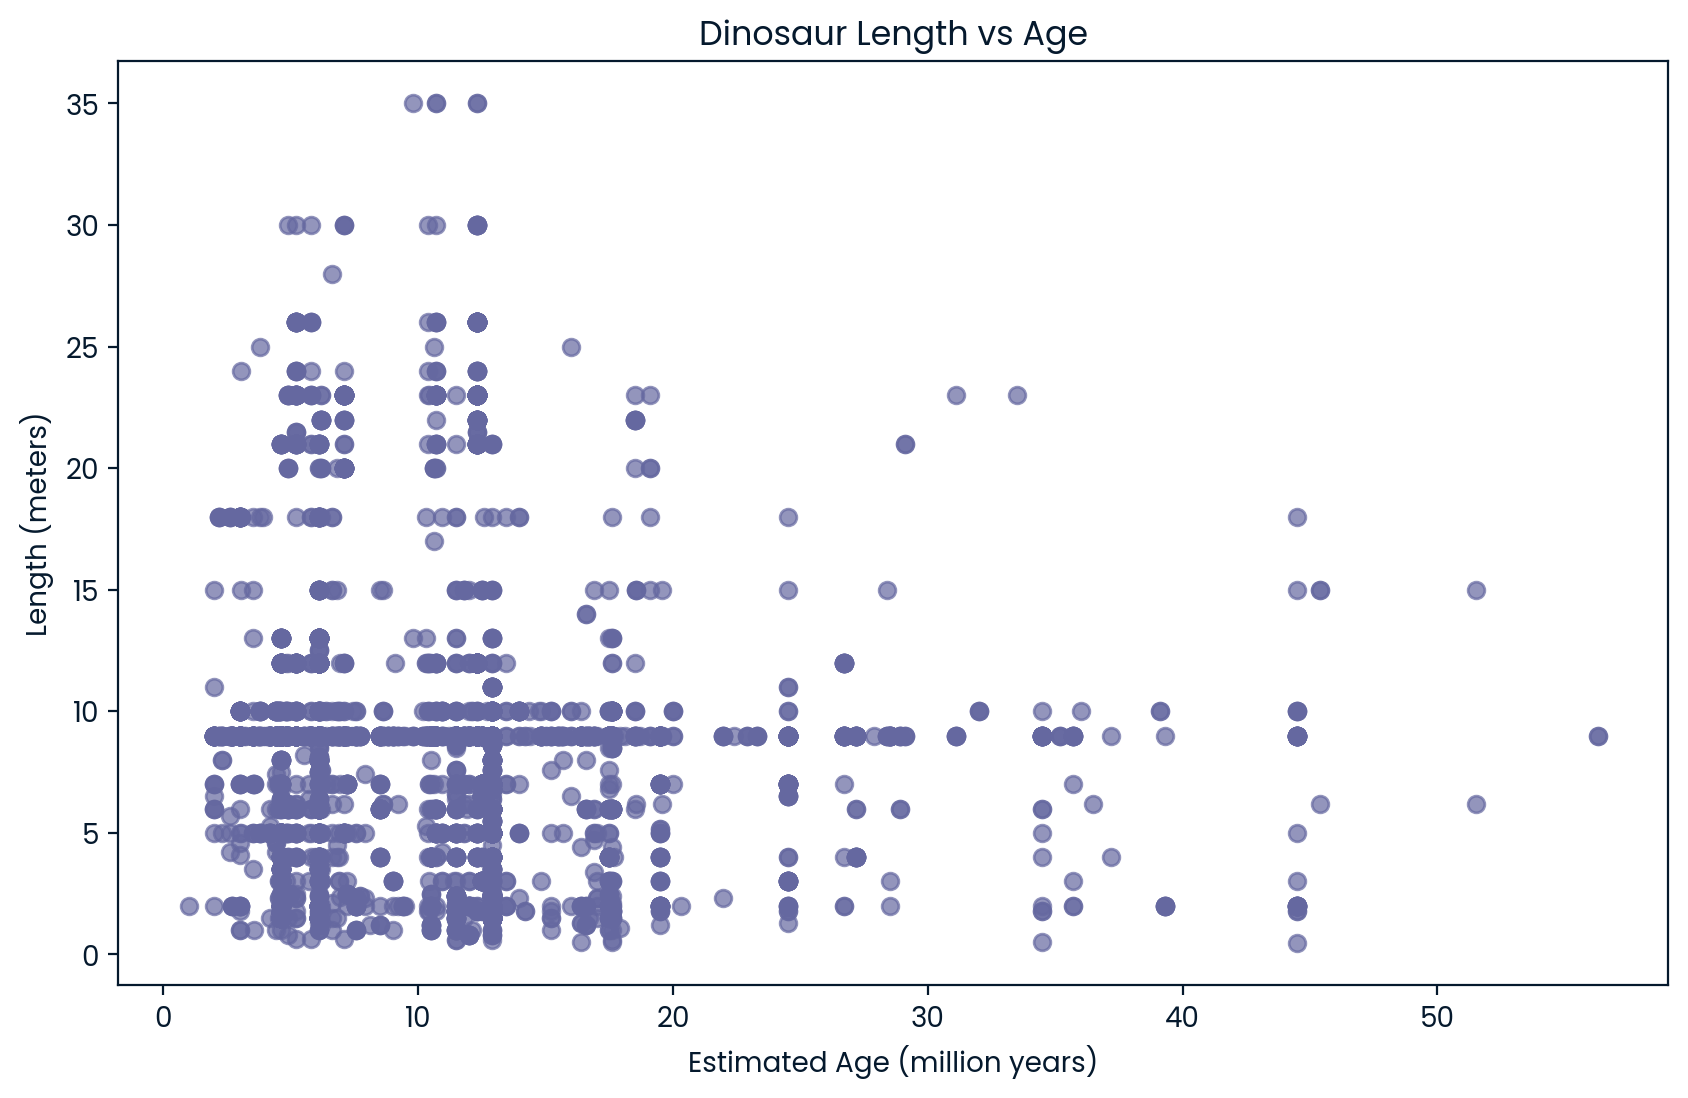

In [33]:
plt.figure(figsize=(10, 6))
dinosaurs['age'] = dinosaurs['max_ma'] - dinosaurs['min_ma']
plt.scatter(dinosaurs['age'], dinosaurs['length_m'], alpha=0.7)
plt.xlabel('Estimated Age (million years)')
plt.ylabel('Length (meters)')
plt.title('Dinosaur Length vs Age')
plt.show()


The above obervations depicts that, the dinosaurs did not get bigger over time.
The calculated age is not an an absolute fact,but rather an estimate based on the available data.

In [34]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
    x=dinosaurs['age'],
    y=dinosaurs['length_m'],
    mode='markers',
    text=dinosaurs['name'],
    marker=dict(
        size=15,
        color=dinosaurs['age'],
        colorscale='Viridis',
        colorbar=dict(
            title='Age (million years)'
        )
    )
))

fig.update_layout(
    title='Dinosaur Length vs Age',
    xaxis_title='Estimated Age (million years)',
    yaxis_title='Length (meters)',
    width=800,
    height=600
)

fig.show()

6. Other insights that could be found during the analysis include:
- The relationships between the dinosaurs diet and type and the geographical distribution of the different dinosaurs type and diet.


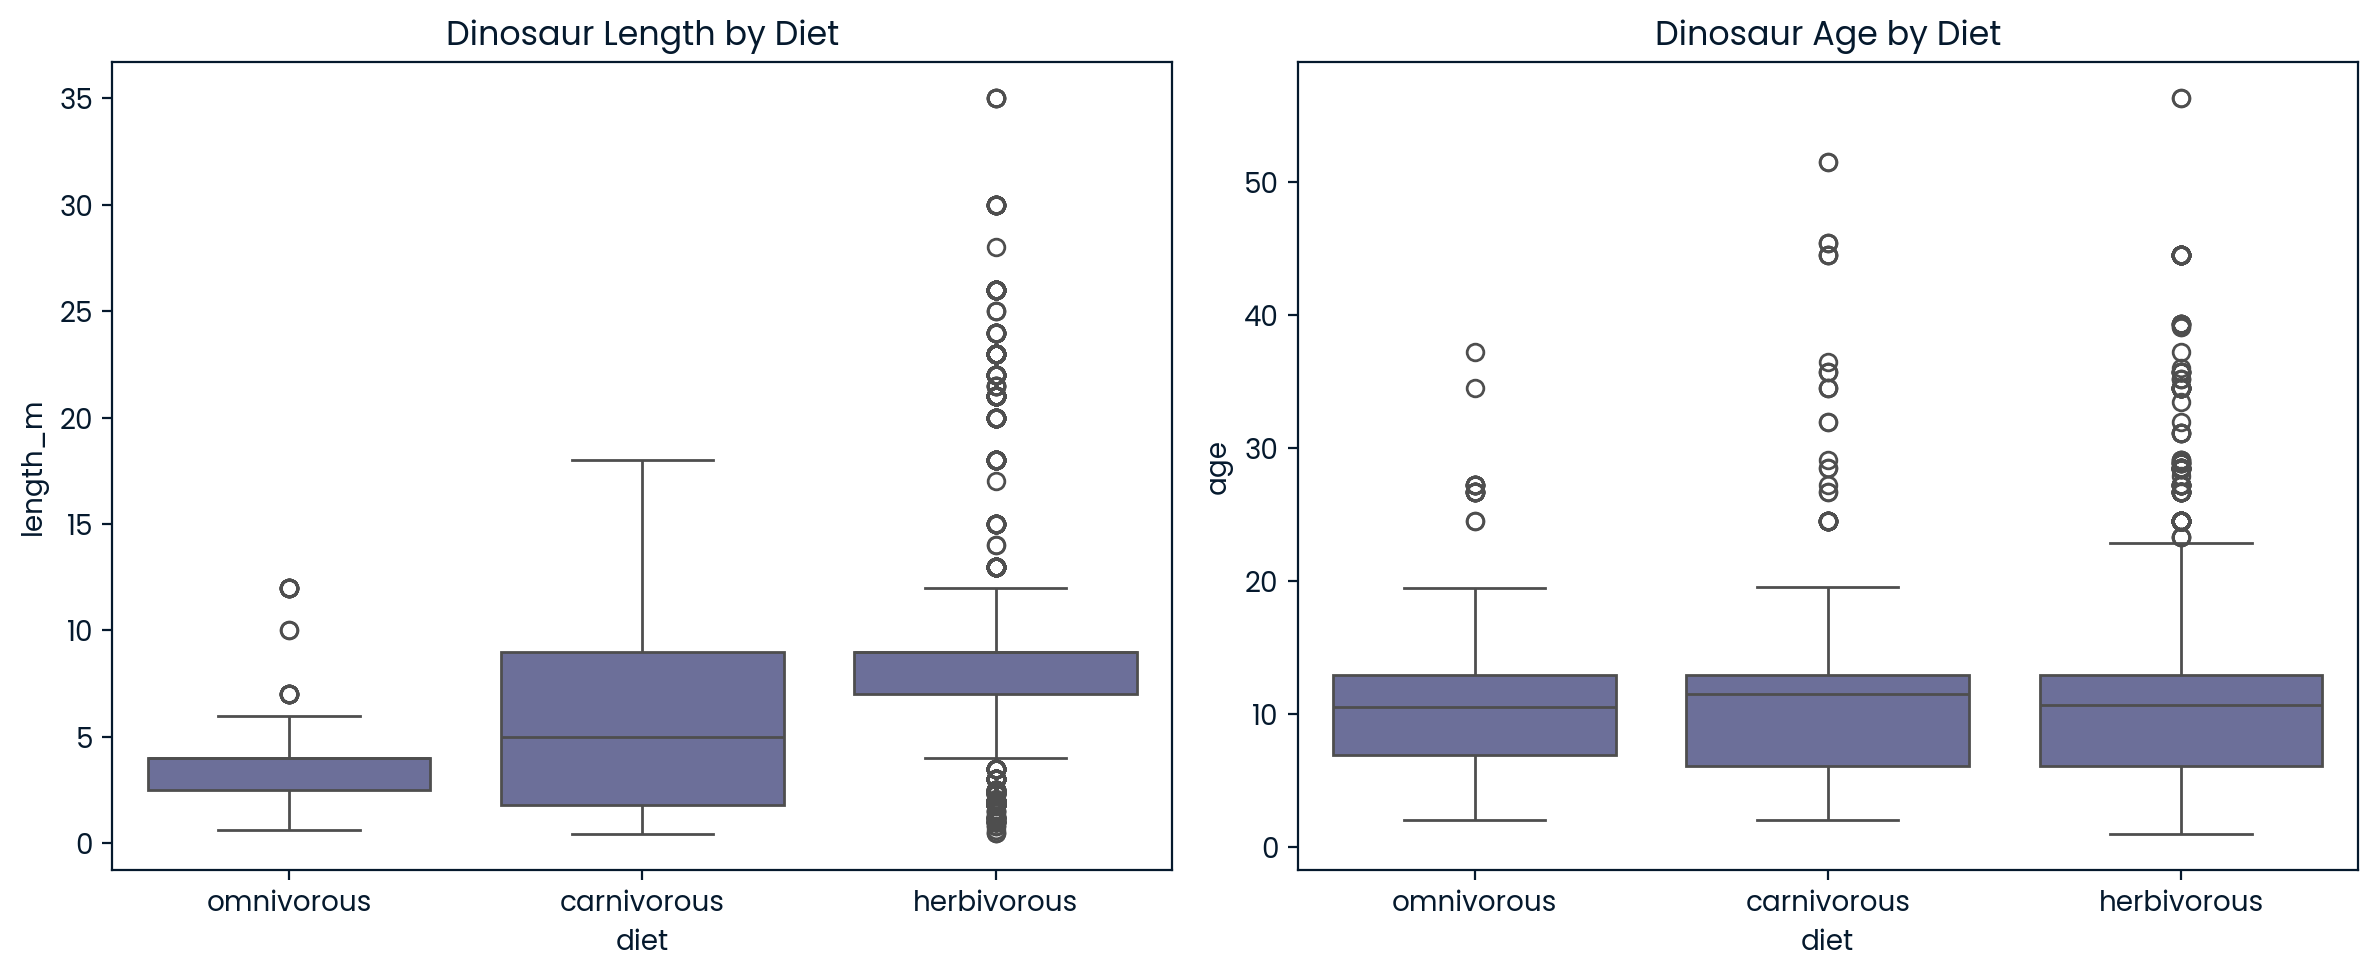

In [35]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Length by diet
sns.boxplot(data=dinosaurs, x='diet', y='length_m', ax=ax1)
ax1.set_title('Dinosaur Length by Diet')
# Age by diet
sns.boxplot(data=dinosaurs, x='diet', y='age', ax=ax2)
ax2.set_title('Dinosaur Age by Diet')

plt.tight_layout()
plt.show()

In [44]:
import folium

 # A map centered on the average longitude and latitude
m = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=4)

# Markers for each dinosaur location
for _, row in dinosaurs.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['name']).add_to(m)

m


In [37]:
print(f"Latitude range: {dinosaurs['lat'].min()} to {dinosaurs['lat'].max()}")
print(f"Longitude range: {dinosaurs['lng'].min()} to {dinosaurs['lng'].max()}")

Latitude range: -84.333336 to 78.101875
Longitude range: -153.247498 to 565.0


Based on the latitude and longitude ranges and the observations made on the map, the following conclusions can be drawn;
1. The latitude range of -84.333336 to 78.101875 suggests that the dinosaurs were found across a range from Antarctica to the Arctic.
2. A longitude range that extends past the 180 degree mark (the International Date Line) suggests the data may include locations across the Eastern and Western hemispheres.
3. In conclusion, the large longitude range, extending up to 565 degrees, is likely an error or inconsistency in the data as longitude values should typically range from -180 to +180 degrees.
Hence, the latitude and longitude ranges provided indicate the data may have significant quality issues that need to be addressed before drawing any meaningful conclusions about the geographical distribution of the dinosaurs. 

# 2️⃣ Part 2 (SQL) - Understanding movie data 🎥 

## 📖 Background
You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

## 💾 The data

### You have access to the following table, _**cinema.films**_:

| Column name | Description |
|---|---|
| id | Unique movie identifier. |
| title | The title of the movie. |
| release_year | The year the movie was released to the public. |
| country | The country in which the movie was released. |
| duration | The runtime of the movie, in minutes. |
| language | The original language the movie was produced in. |
| certification | The [rating](https://simple.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) the movie was given based on their suitability for audiences. |
| gross | The revenue the movie generated at the box office, in USD. |
| budget | The available budget the production had for producing the movie, in USD. |

You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

The data was sourced from [IMDb](https://www.imdb.com/).

## 💪 Challenge II
Help your team leader understand the data that's available in the _cinema.films_ dataset. Include:

1. How many movies are present in the database?
2. There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies? (Don't forget you can use the AI assistant!)
6. Any other insights you found during your analysis? 

In [38]:
SELECT * 
FROM cinema.films
LIMIT 10

id                                             title  ...      gross     budget
0   1  Intolerance: Love's Struggle Throughout the Ages  ...        NaN   385907.0
1   2                    Over the Hill to the Poorhouse  ...  3000000.0   100000.0
2   3                                    The Big Parade  ...        NaN   245000.0
3   4                                        Metropolis  ...    26435.0  6000000.0
4   5                                     Pandora's Box  ...     9950.0        NaN
5   6                               The Broadway Melody  ...  2808000.0   379000.0
6   7                                     Hell's Angels  ...        NaN  3950000.0
7   8                                A Farewell to Arms  ...        NaN   800000.0
8   9                                       42nd Street  ...  2300000.0   439000.0
9  10                                She Done Him Wrong  ...        NaN   200000.0

[10 rows x 9 columns]

1. Number of movies present in the database

In [39]:
SELECT COUNT(*) AS total_movies 
FROM cinema.films;

total_movies
0          4968

2. Number of missing data in the gross and budget columns

In [40]:
SELECT 
  SUM(CASE WHEN gross IS NULL THEN 1 ELSE 0 END) AS missing_gross,
  SUM(CASE WHEN budget IS NULL THEN 1 ELSE 0 END) AS missing_budget
FROM cinema.films;

missing_gross  missing_budget
0            810             430

3. Different certifications present in the database

In [41]:
SELECT DISTINCT certification 
FROM cinema.films;

certification
0        Unrated
1              M
2              G
3          NC-17
4             GP
5             PG
6       Approved
7              X
8          PG-13
9               
10             R
11     Not Rated
12        Passed

4. Top five countries in terms of movies produced

In [42]:
SELECT 
  country, 
  COUNT(*) AS movie_count
FROM cinema.films
GROUP BY country
ORDER BY movie_count DESC
LIMIT 5;

country  movie_count
0      USA         3750
1       UK          443
2   France          153
3   Canada          123
4  Germany           97

5. Average duration of English Versus French

In [43]:
SELECT 
  language, 
  AVG(duration) AS avg_duration
FROM cinema.films
WHERE language IN ('English', 'French')
GROUP BY language;

language  avg_duration
0   French    104.666667
1  English    107.636541

6. Further Insights

The missing data in the gross and budget columns could be an area of concern since a lot of data is missing which could be very crucial for our analysis or modeling.
Exploring the relationships between the various attributes such as; budget, gross, duration, certification etc as well as analyzing the movie production and performance data by geographical location could yield additional insights about the movie industry and production factors.
